In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
#This is to import data from the dataset

df= pd.read_csv('heart.csv')

### Description of the Features and key words with their data Types

|Variable | Description|
|--------------|-----------|
|age: |The age of the patient.|
|sex: |Gender of the patient (0: female, 1: male).|
|cp: |Type of chest pain. 
| |0: Typical angina,|
| |1: Atypical angina, |
| |2: Non-anginal pain, |
| |3: Asymptomatic|
|trestbps: |Resting blood pressure.|
|chol: |Serum cholesterol.|
|fbs: |Fasting blood sugar > 120 mg/dl. |
||1: true, |
||0: false|
|restecg: |Resting electrocardiographic results.|
||0: Normal,|
||1: Having ST-T wave abnormality,|
||2:Showing probable or definite left ventricular hypertrophy|
|thalach: |Maximum heart rate achieved.|
|exang: |Exercise induced angina.|
||1: yes, |
||0: no|
|oldpeak: |ST depression induced by exercise relative to rest|
|slope	|Slope of the peak exercise ST segment: |
||0: Upsloping |
||1: Flat|
||2: Downsloping|
|ca	|Number of major vessels (0-4) colored by fluoroscopy|
|thal	|Thalium stress test result:|
||0: Normal |
||1: Fixed defect |
||2: Reversible defect |
||3: Not described|
|target : |0= less chance of heart attack |
||1= more chance of heart attack|

In [3]:
#This is to check the first 10 head of the data
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#This is to check the last ten lines of the dataframe
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#This is to output the dimension of a dataFrame
print(df.shape)

(303, 14)


In [6]:
#this is to show the descriptive statistics of the numerical columns of this dataFrame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#this is to get the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [8]:
# This is to count the number of missing values in each column and print the total
CountValueMissing = df.isnull().sum()

# Print the missing value
print(CountValueMissing)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### There are no missing value in the dataset

In [9]:
#Check if there are dupplicate values
df.duplicated().sum()


1

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#This is to use LabelEncoder to transform categorical columns to object:sex, cp, fbs, restecg, exang, slope, ca, thal, target'
#This is because they are all ordinal variables

label_encode_group = LabelEncoder()

def clean_data(df):
    
    # Apply label encoding to categorical columns listed below 
    
    convert_these_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
    for col in convert_these_columns:
        df[col] = label_encode_group.fit_transform(df[col])
    
    # Convert encoded values to object type
    for col in convert_these_columns:
        df[col] = df[col].astype('object')
    
    return df

# Clean the data
data_clean = clean_data(df)
# display the new info
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [12]:
# Get the summary statistics for numerical variables
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [13]:
# Get the summary statistics for categorical variables
df.describe(include='object')


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


### Exploratory Data Analysis (EDA)

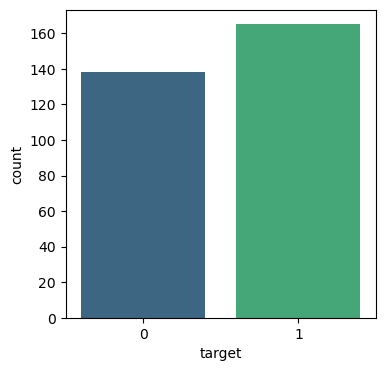

In [14]:
#This code creates a count plot to visualize the distribution of the 'stroke' variable

plt.figure(figsize = (4,4))
sns.countplot(x = 'target', data = df, palette = 'viridis')
plt.show()

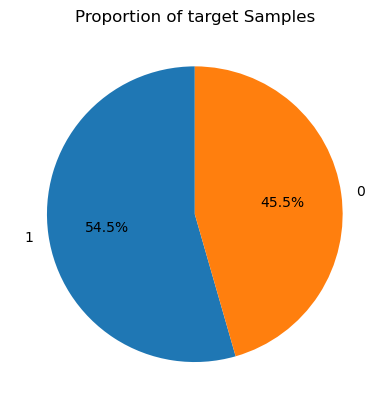

In [15]:
s_data = df['target'].value_counts()

# Plotting the pie chart
plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of target Samples')
plt.show()

In [16]:
#This code snippet aims to identify categorical and discrete features
#Prints the names of the categorical and discrete features
col = list(df.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)


dfcopy = df.copy(deep = True)

Categorical Features : sex cp fbs restecg exang slope ca thal target
Discrete Features : age trestbps chol thalach oldpeak


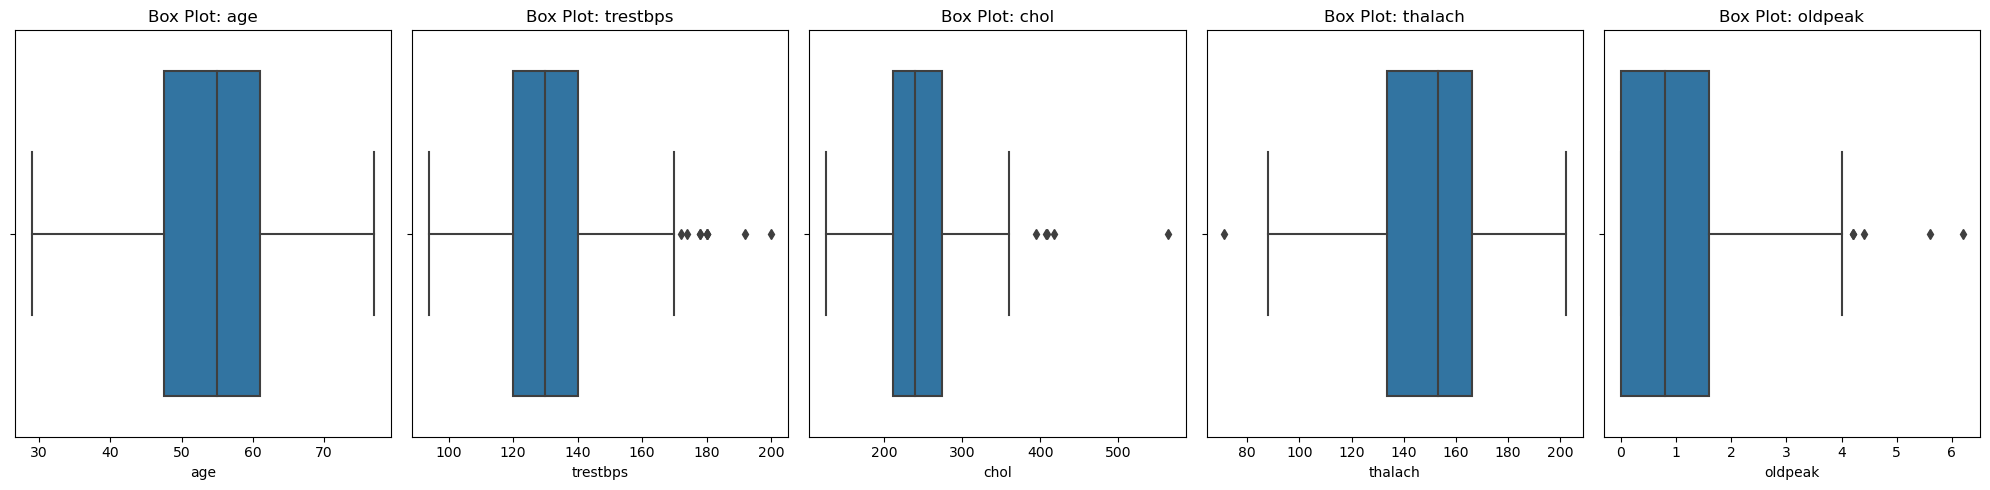

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=len(discrete_features), figsize=(20, 5))

# Plot box plots for each discrete feature
for i, feature in enumerate(discrete_features):
    sns.boxplot(x=dfcopy[feature], ax=ax[i])
    title = 'Box Plot: ' + feature
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

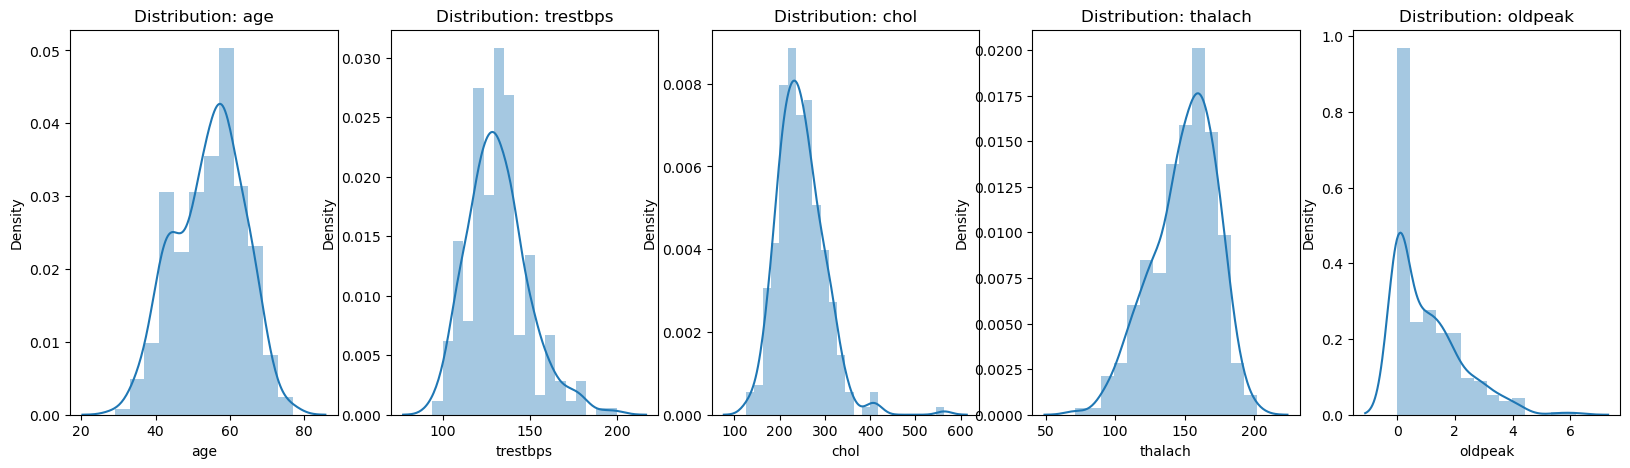

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i in range(len(discrete_features)):
    sns.distplot(dfcopy[discrete_features[i]], ax=ax[i])
    title = 'Distribution: ' + discrete_features[i]
    ax[i].set_title(title)

plt.show()

In [19]:
#Show the mean mode and median of the numerical features
df.describe(include='number')


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### From Visuals

NOTE: This is before outliers are dealt with

#### Age
For Age, we can see from the visuals that the peak is between age 50s and less than 60. The mean gave us 54.36years and also a standard deviation of 9.08 years

#### Resting Blood Pressure called trestbps
The concentration of values is around 120-140 mm Hg. The average resting blood pressure for individuals in the population is approximately 131.62 mm Hg which is the mean. There is variability in individual blood pressure values because standard deviation is approximatly 17.54mm Hg, with most falling within one standard deviation from the mean 

#### Serum Cholesterol called chol
The average serum cholesterol level for individuals in the population is approximately 246.26 mg/dl (mean), there is variability in individual cholesterol values, with most falling within one standard deviation(51.8 mg/dl) from the mean, and a concentration of values between 200 and 300 mg/dl.

#### Maximum Heart Rate Achieved called thalach
The average heart rate achieved during the stress test is approximately 149.65 bpm (mean), there is variability in individual heart rate values, with most falling within one standard deviation (22.90 bpm) from the mean, and a concentration of values between 140 and 170 bpm.

#### ST Depression Induced by Exercise called oldpeak
The average ST depression induced by exercise is approximately 1.04 (mean), there is variability in individual ST depression values, with most falling within one standard deviation (1.16) from the mean, and a concentration of values towards 0, indicating that many individuals did not experience significant ST depression during exercise.

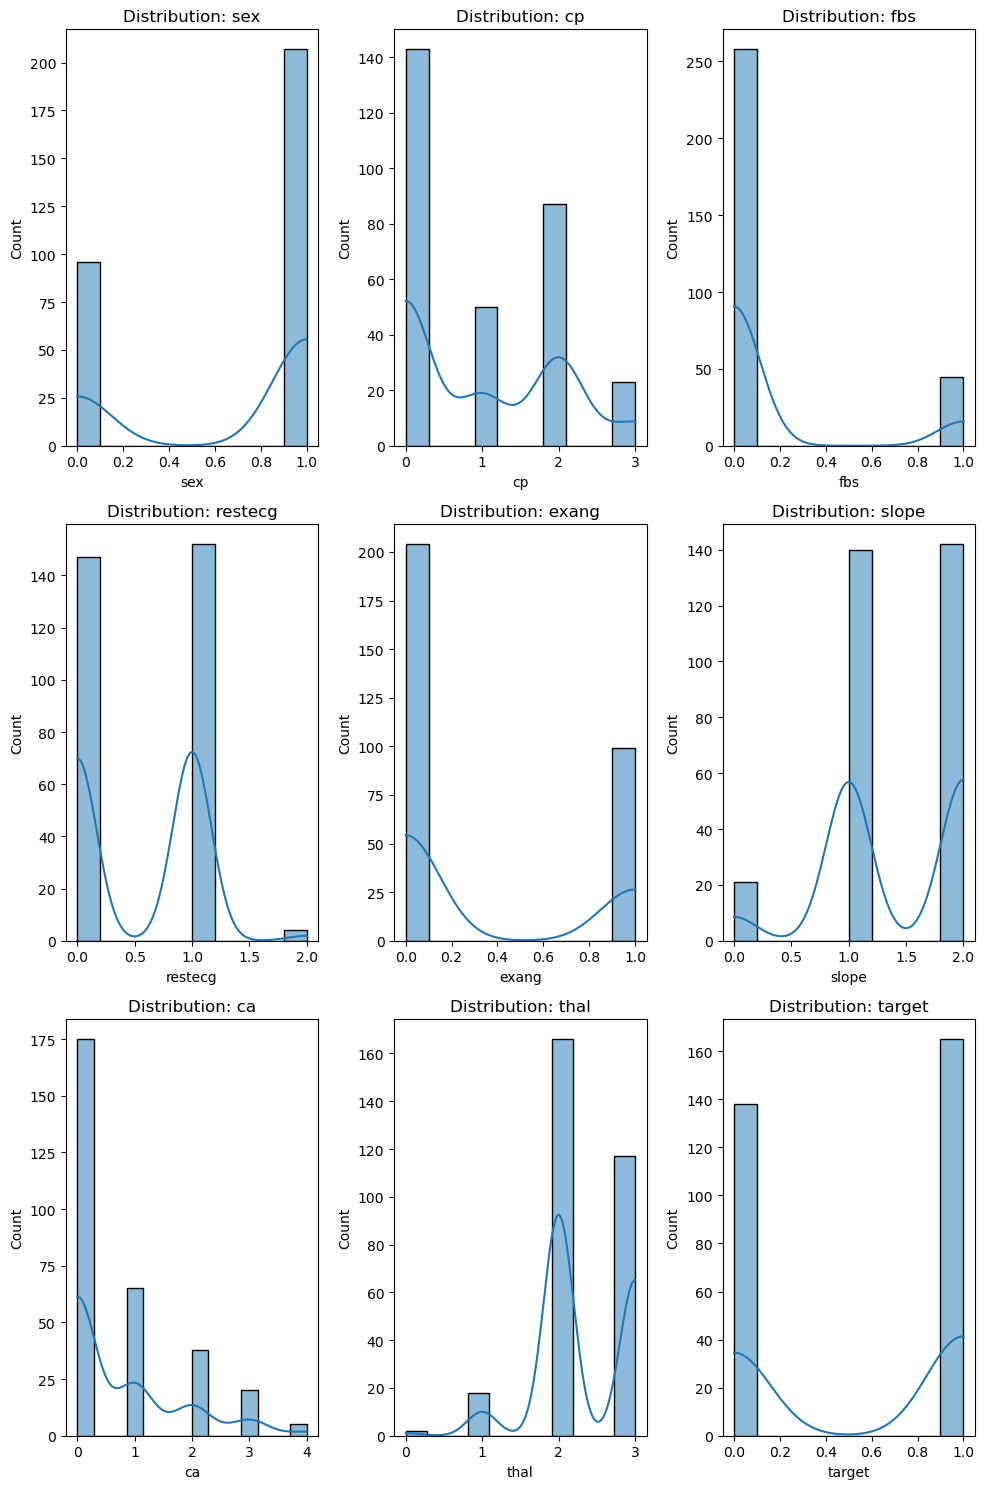

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

# Plot distribution plots for each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.histplot(dfcopy[feature], ax=ax[row, col], kde=True)  # Use histplot instead of distplot
    title = 'Distribution: ' + feature
    ax[row, col].set_title(title)

plt.tight_layout()
plt.show()

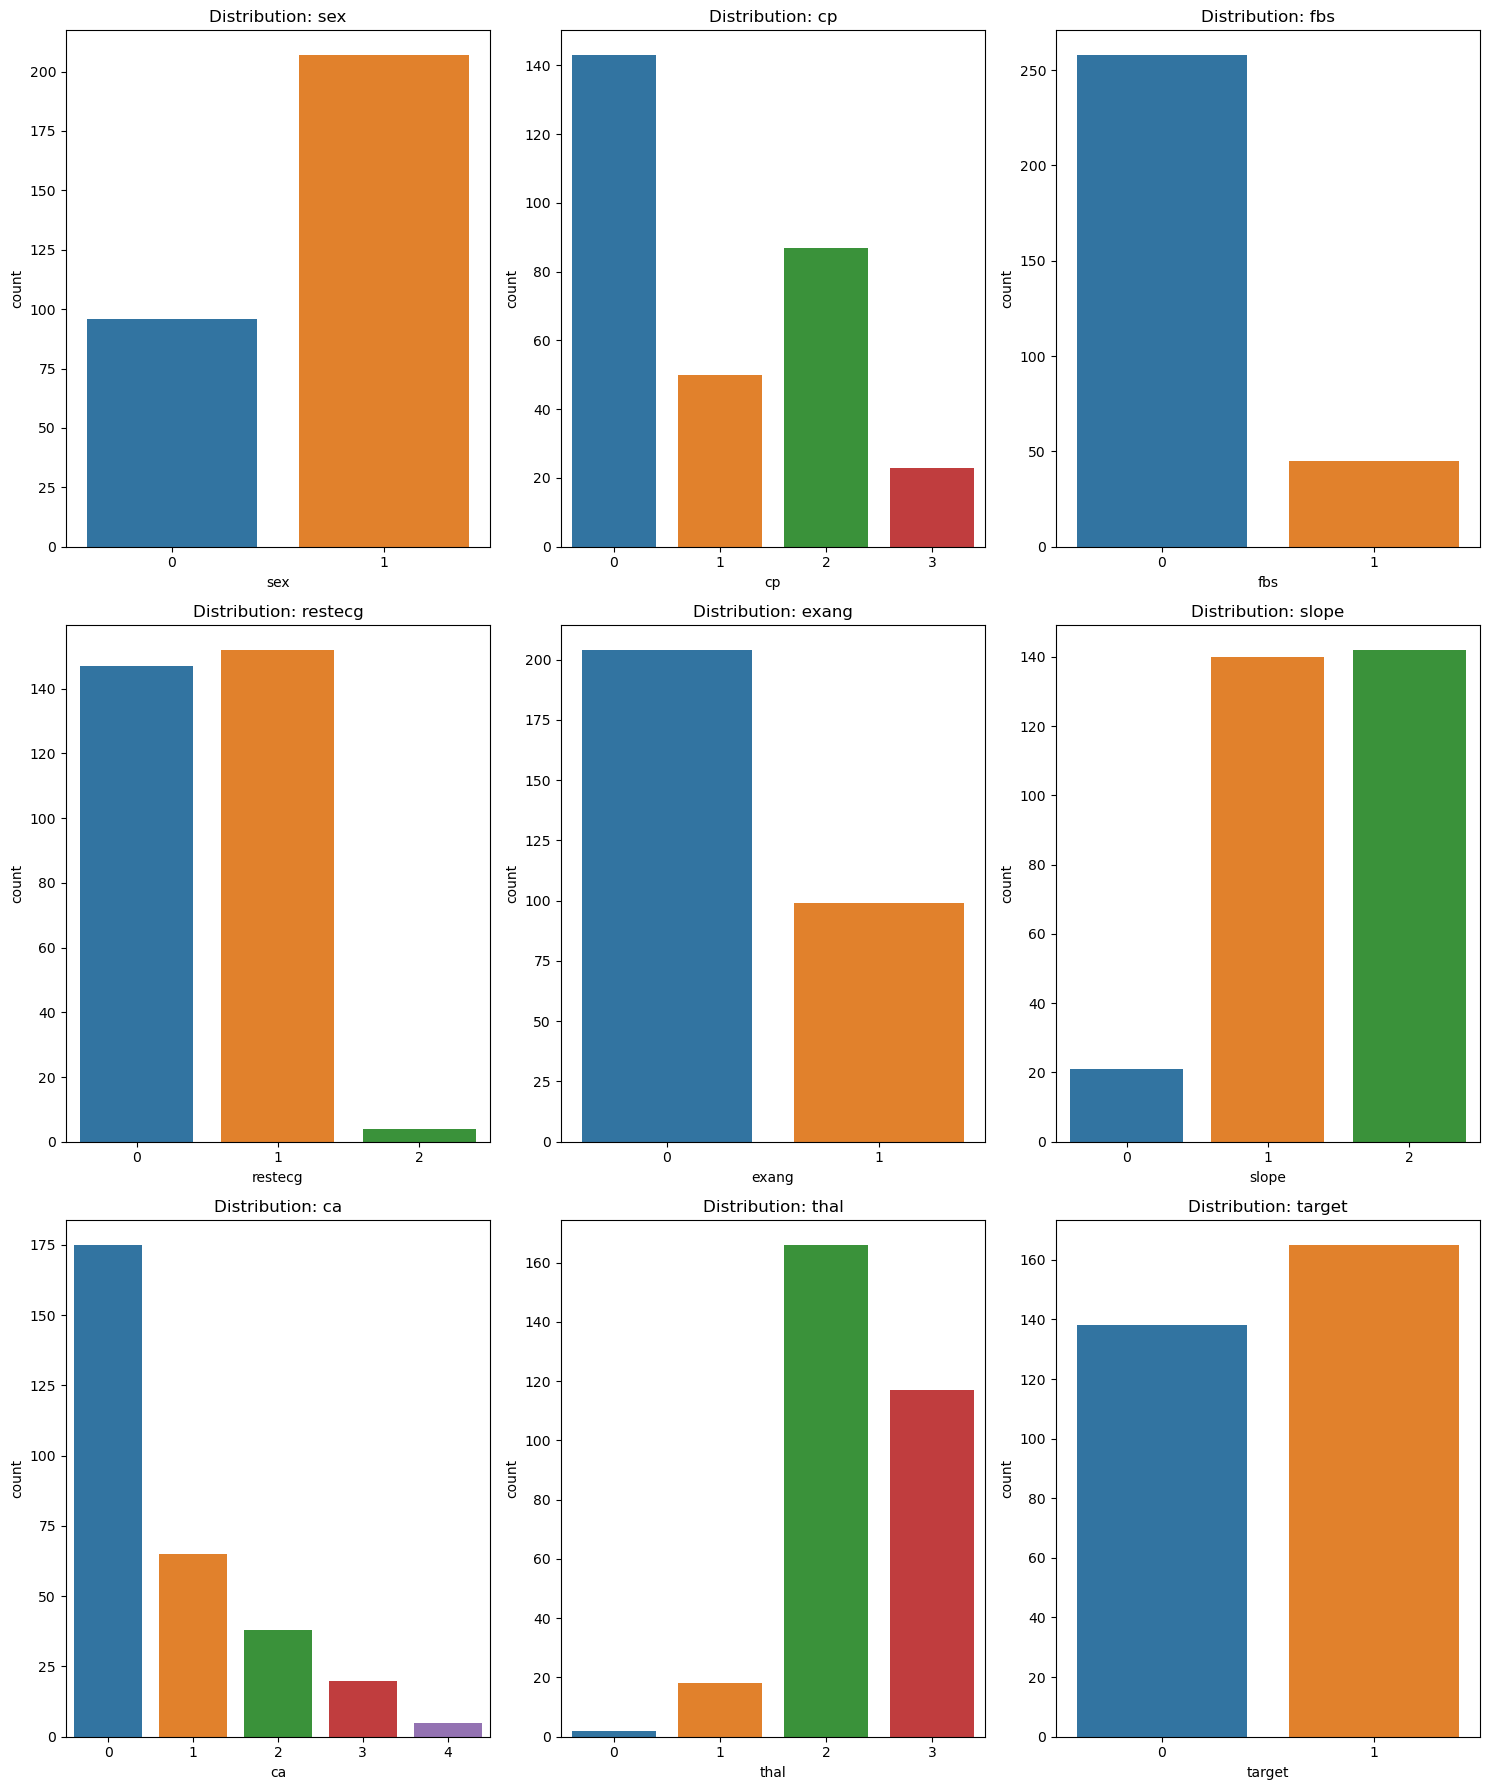

In [21]:
#This is to show the distibution plot for the categorical features

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 18))


for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(x=feature, data=dfcopy, ax=ax[row, col])
    title = 'Distribution: ' + feature
    ax[row, col].set_title(title)

plt.tight_layout()
plt.show()

In [22]:
#Show the mean mode and median of the numerical features
df.describe(include='number')


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [23]:
#Show the mean mode and median of the categorical features
df.describe(include='object')


,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


## Correlation Matrix

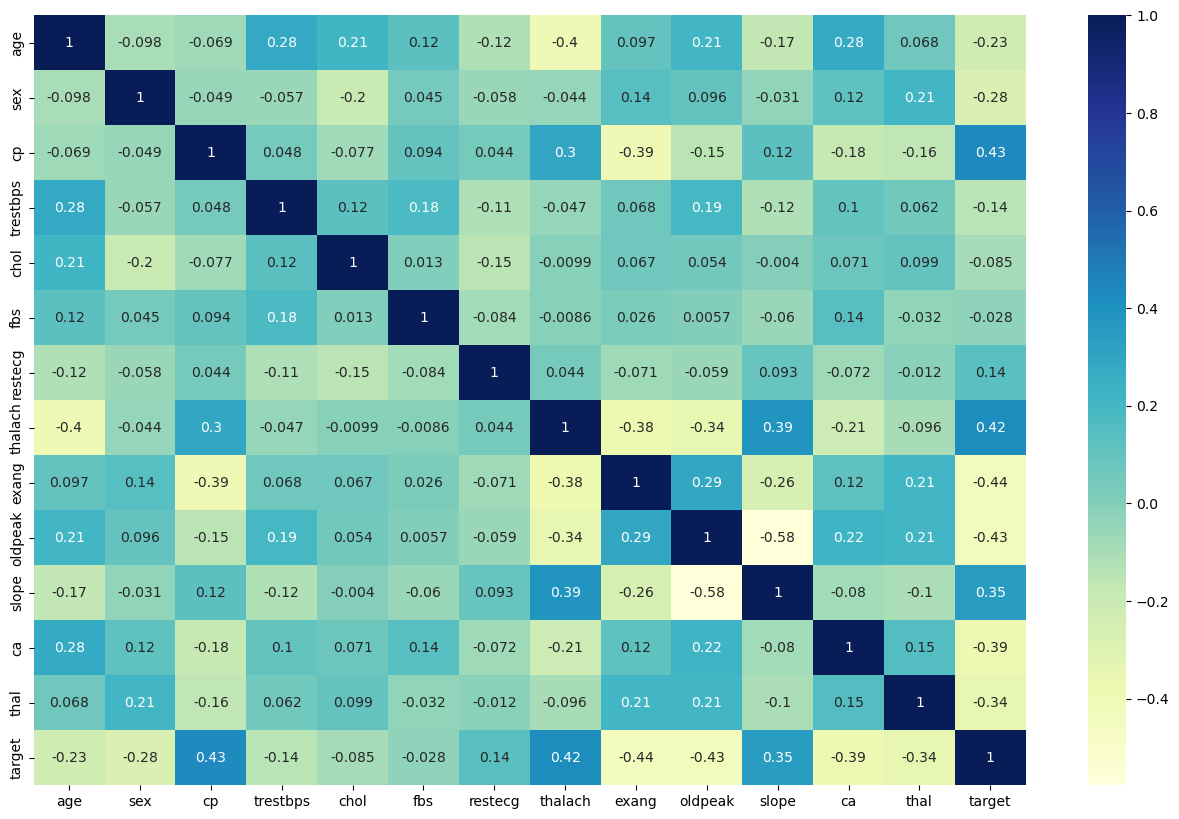

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Data Preprocessing

#### Outliers

Total number of outliers in age is 0
Total number of outliers in trestbps is 9
Total number of outliers in chol is 5
Total number of outliers in thalach is 1
Total number of outliers in oldpeak is 5


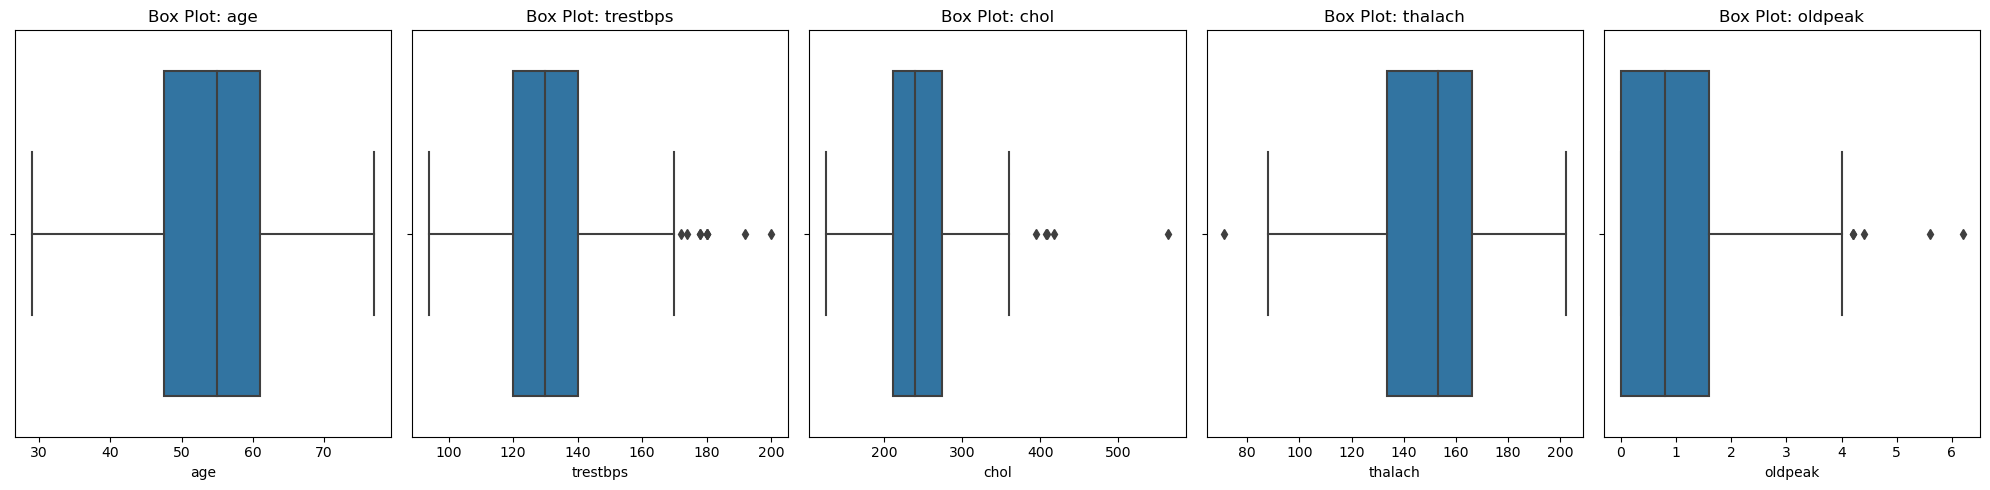

In [25]:
#This is to display and show the numbers of outliers in the discrete futures
fig, ax = plt.subplots(nrows=1, ncols=len(discrete_features), figsize=(20, 5))

# Store the sum of outliers for each feature
outliers_total = []

# Plot box plots for each discrete feature
for i, feature in enumerate(discrete_features):
    sns.boxplot(x=dfcopy[feature], ax=ax[i])
    title = 'Box Plot: ' + feature
    ax[i].set_title(title)
    
    # Calculate the number of outliers for the current feature
    Low = dfcopy[feature].quantile(0.25)
    High = dfcopy[feature].quantile(0.75)
    iqr = High - Low
    lower_bound = Low - 1.5 * iqr
    upper_bound = High + 1.5 * iqr
    outliers_count = ((dfcopy[feature] < lower_bound) | (dfcopy[feature] > upper_bound)).sum()
    outliers_total.append(outliers_count)

# Display the sum of outliers for each feature
for i, feature in enumerate(discrete_features):
    print(f"Total number of outliers in {feature} is {outliers_total[i]}")

plt.tight_layout()
plt.show()

#### Dealing with outliers

#### Justification

We will deal with outlier using Transformation method of Yeo-Johnson to handle the outlier to suppress its impact on modeling. This is because we can not delete out of the dataset due to the small samplling quantity of data we have.

In [26]:
# These are the categorical features for one-hot encoding to use
categorical_features = ['cp', 'restecg', 'thal']

# Perform one-hot encoding for the specified categorical features with dtype set to 'int'
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype='int')

# Change the remaining categorical variables to integer data type
features_to_change = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_change:
    df_encoded[feature] = df_encoded[feature].astype(int)

# Display data types of all columns in the encoded DataFrame
print(df_encoded.dtypes)

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1           int32
cp_2           int32
cp_3           int32
restecg_1      int32
restecg_2      int32
thal_1         int32
thal_2         int32
thal_3         int32
dtype: object


In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#This is to display the first 10 head of the one-hot encoded dataframe
df_encoded.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0
5,57,1,140,192,0,148,0,0.4,1,0,1,0,0,0,1,0,1,0,0
6,56,0,140,294,0,153,0,1.3,1,0,1,1,0,0,0,0,0,1,0
7,44,1,120,263,0,173,0,0.0,2,0,1,1,0,0,1,0,0,0,1
8,52,1,172,199,1,162,0,0.5,2,0,1,0,1,0,1,0,0,0,1
9,57,1,150,168,0,174,0,1.6,2,0,1,0,1,0,1,0,0,1,0


### Spliting the data into train and test

In [29]:
# This is to define the features (X) and the output labels (Y)
X = df_encoded.drop('target', axis=1)
Y = df_encoded['target'] 


# Split the resampled data into training and testing sets using 80 : 20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

# Print the shapes of the new training and testing sets
print('After Splitting, the shape of X_train: {}'.format(X_train.shape))
print('After Splitting, the shape of X_test: {}'.format(X_test.shape))
print('After Splitting, the shape of Y_train: {}'.format(Y_train.shape))
print('After Splitting, the shape of Y_test: {}'.format(Y_test.shape))


After Splitting, the shape of X_train: (242, 18)
After Splitting, the shape of X_test: (61, 18)
After Splitting, the shape of Y_train: (242,)
After Splitting, the shape of Y_test: (61,)


#### Justification

We will make use of Yeo-Johnson transformation beacause this can handle skewed data that are both possitive and negative instead of the like of Box-Cox which only handle possitive values by introducing constants to the train set to make it possitive

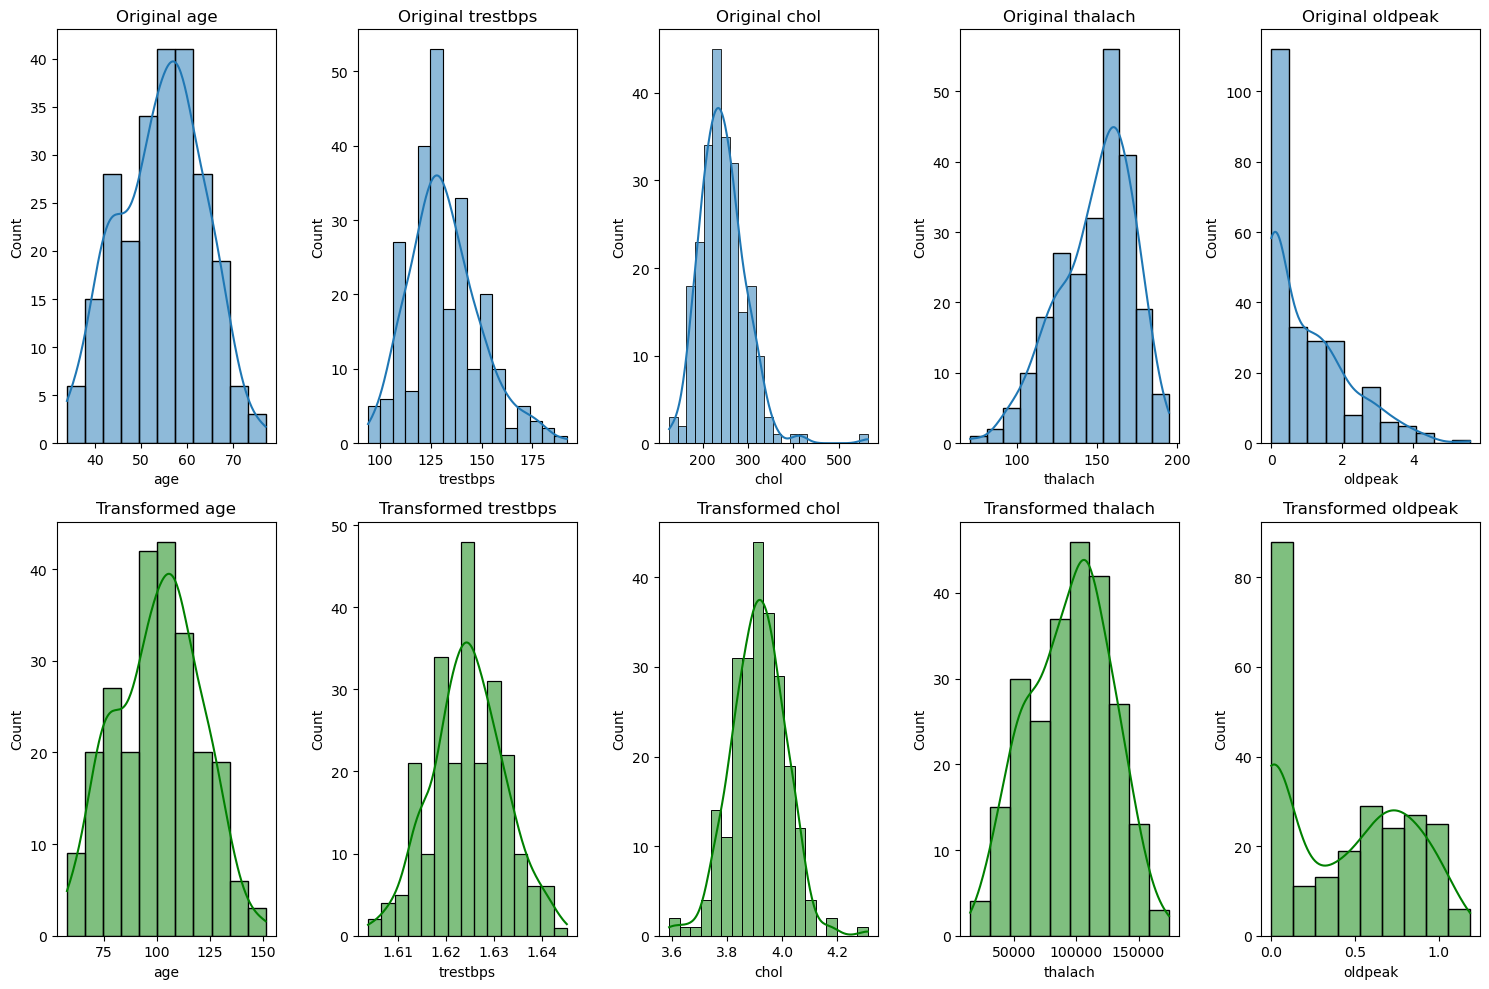

In [30]:

# Checking the distribution of the discrete_features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(discrete_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i]).set_title(f'Original {col}')
    

# Applying Yeo-Johnson Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(discrete_features):
    # Apply Yeo-Johnson transformation
    X_train[col], lambdas[col] = yeojohnson(X_train[col])
    # Apply the same transformation to test data
    X_test[col] = yeojohnson(X_test[col], lmbda=lambdas[col]) 
    sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'Transformed {col}')

fig.tight_layout()
plt.show()



In [31]:
#display the X_train 
X_train.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,103.819591,1,1.624652,3.996408,1,36767.222475,1,0.747228,0,0,0,0,0,0,0,0,0,1
191,108.219649,1,1.623733,3.865387,0,66048.552876,1,0.864772,1,3,0,0,0,0,0,0,0,1
15,90.802269,0,1.619820,3.872185,0,104339.258738,0,0.747228,1,0,0,1,0,1,0,0,1,0
224,99.449416,1,1.614312,3.914981,0,60070.113516,1,0.952607,1,1,0,0,0,1,0,0,0,1
250,92.952111,1,1.628935,4.020950,0,55527.635206,1,1.093423,1,3,0,0,0,1,0,0,0,1
63,71.838222,1,1.626856,3.834651,0,67284.762550,0,-0.000000,1,0,1,0,0,1,0,1,0,0
130,99.449416,0,1.636211,3.829726,0,112586.577300,0,-0.000000,2,1,0,1,0,1,0,0,1,0
139,121.591170,1,1.623733,3.961304,0,38528.910499,1,0.173671,1,1,0,0,0,1,0,0,0,1
288,106.015937,1,1.614312,4.075974,0,81791.980438,1,0.977289,1,1,0,0,0,1,0,0,0,1
260,126.103034,0,1.641636,3.891965,1,115990.109143,1,0.578651,1,2,0,0,0,1,0,0,0,1


### MODEL EVALUATION

In [32]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=0)

# Train the decision tree classifier
dt_classifier.fit(X_train, Y_train)

# Evaluate the optimized model on the train data
print(classification_report(Y_train, dt_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       110
           1       0.93      0.86      0.89       132

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242



In [33]:
# Evaluate the optimized model on the test data
print(classification_report(Y_test, dt_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Accuracy on test data:77.05%
TN=22, FP=6, FN=8, TP=25


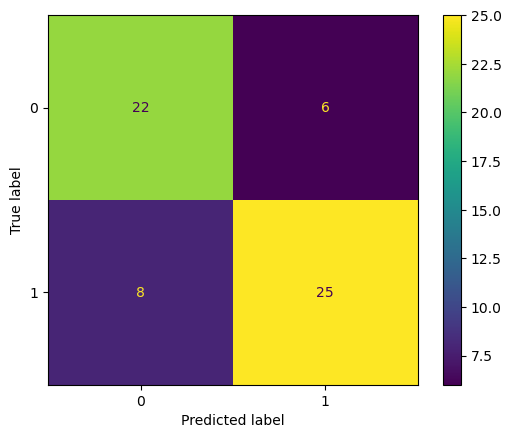

In [34]:
#Confusion metrix for the test 

test_predict=dt_classifier.predict(X_test)
print("Accuracy on test data:{:.2f}%".format((accuracy_score(Y_test, test_predict))*100))

cm = confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [35]:
# Call the function for hyperparameter tuning
#dt_classifier, dt_classifier_hyperparameter = tune_clf_hyperparameters(dt_classifier, param_grid_dt, X_train, Y_train)

In [36]:
def tune_clf_hyperparameters(clf, param_grid, X_train, Y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, Y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters


# Hyperparameter grid for DT
parameter_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}


# Call the function for hyperparameter tuning
dt_classifier, dt_classifier_hyperparameter = tune_clf_hyperparameters(dt_classifier, parameter_grid_dt, X_train, Y_train)

print('DT Optimal Hyperparameters: \n', dt_classifier_hyperparameter)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


### The Train Set

In [37]:
# Train the decision tree classifier
model=dt_classifier.fit(X_train, Y_train)

# Evaluate the optimized model on the train data
print(classification_report(Y_train, dt_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



### The Test Set

In [38]:
# Evaluate the optimized model on the test data
print(classification_report(Y_test, dt_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



Accuracy on test data:77.05%
TN=22, FP=6, FN=8, TP=25


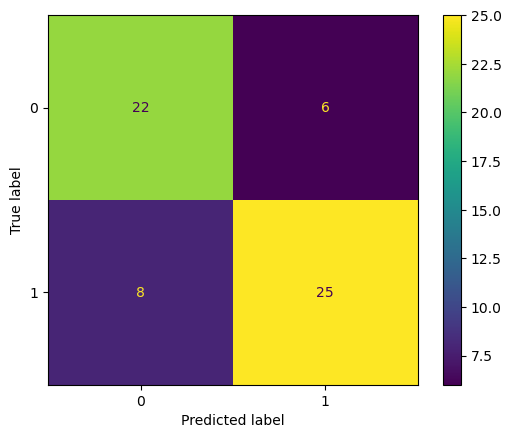

In [39]:
#Confusion matrix for the test 


print("Accuracy on test data:{:.2f}%".format((accuracy_score(Y_test, test_predict))*100))


cm = confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [40]:
def evaluate_model(model, X_test, Y_test, model_name):
    
    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Compute classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)
    
    # Extract metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(Y_test, Y_pred)
    }
    
    # Create DataFrame
    evaluation_df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return evaluation_df

dt_evaluation = evaluate_model(dt_classifier, X_test, Y_test, 'Dicision Tree')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
Dicision Tree,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


## Splitting the True and Predicted Values into Male and Female Categories

In [41]:
# This define the protected characteristic (sex which is gender)
protected_char = "sex"

# This define the values representing men and women
men_val = 1
women_val = 0

# This Count the distribution of genders in the dataset
gender_distribution = X_test[protected_char].value_counts()

# Get the indices of men and women in the dataset
men_indices = np.where(X_test[protected_char] == men_val)[0]
women_indices = np.where(X_test[protected_char] == women_val)[0]

# Print the distribution and number of men and women
print("Gender distribution:")
print(gender_distribution)
print()
print()
print("Indices of Men are", men_indices, "Number of Men =", men_indices.size)
print()
print()
print("Indices of Women are", women_indices, "Number of Women =", women_indices.size)

Gender distribution:
sex
1    35
0    26
Name: count, dtype: int64


Indices of Men are [ 0  2  4  5  7 10 14 15 17 19 20 21 23 24 25 26 28 29 31 32 33 36 37 38
 39 42 43 44 50 51 52 55 56 57 60] Number of Men = 35


Indices of Women are [ 1  3  6  8  9 11 12 13 16 18 22 27 30 34 35 40 41 45 46 47 48 49 53 54
 58 59] Number of Women = 26


The Focus now is to use the indices to split Y_test into two categories (one for Male and one for Female)


#### Justification

Next is to takes the indices of men and women obtained from the previous step and uses them to extract corresponding labels from the Y_test dataset.

In [42]:
#Get and dispaly the test labels for men and women
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]

print("Labels test for men:", Y_test_m)
print()
print("Labels test for women:", Y_test_f)


Labels test for men: [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]

Labels test for women: [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [43]:
#Get and dispaly the predict labels for men and women

Y_pred = model.predict(X_train)

Y_predict_m = [Y_pred[i] for i in men_indices]
Y_predict_f = [Y_pred[i] for i in women_indices]

print("Labels predict for men:", Y_predict_m)
print()
print("Labels predict for women:", Y_predict_f)

Labels predict for men: [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]

Labels predict for women: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


TN=15, FP=7, FN=8, TP=5


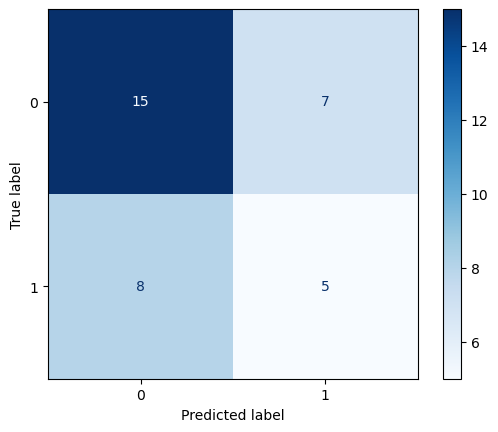

In [65]:
# Generate the confusion matrix for men
con_max_male = confusion_matrix(Y_test_m, Y_predict_m)
TN_m, FP_m, FN_m, TP_m = con_max_male.ravel()  

# Print the confusion matrix metrics for men
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m, FN_m, TP_m))

# Display confusion matrix for men
disp = ConfusionMatrixDisplay(confusion_matrix=con_max_male)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Performance Metrix For Men

#### This is to compute the performance metrix for men

In [45]:
# This is performance metrics for men
accuracy_men = (((TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m))*100)
precision_men = ((TP_m / (TP_m + FP_m))*100)
recall_men = ((TP_m / (TP_m + FN_m))*100)
f1_score_men = 2 * (precision_men * recall_men) / (precision_men + recall_men)

# Print performance metrics for men
print("Accuracy for men:{:.2f}%".format(accuracy_men))
print("Precision for men:{:.2f}%".format(precision_men)) 
print("Recall for men:{:.2f}%".format(recall_men))
print("F1-score for men:{:.2f}%".format(f1_score_men))

Accuracy for men:57.14%
Precision for men:41.67%
Recall for men:38.46%
F1-score for men:40.00%


# FEMALE

For Women:
TN=1, FP=5, FN=8, TP=12


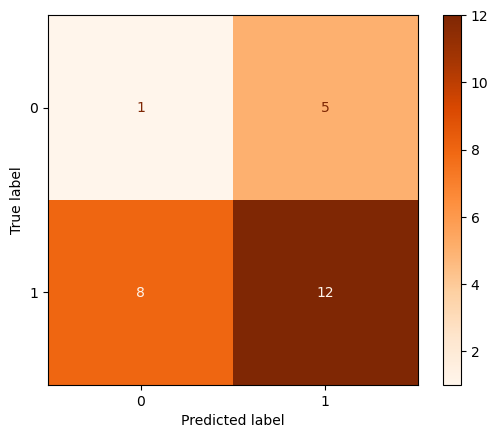

In [71]:

# Generate confusion matrix for women
con_max_female = confusion_matrix(Y_test_f, Y_predict_f)

# Get TN, FP, FN, TP from confusion matrix for women
TN_f, FP_f, FN_f, TP_f = con_max_female.ravel()


# Print the metrics for women
print("For Women:")
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f, FN_f, TP_f))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=con_max_female)
disp.plot(cmap=plt.cm.Oranges)
plt.show()

### Performance metric for female

#### This is to compute the performance metrics for female

In [47]:
# This is performance metrics for female
accuracy_female = (((TP_f + TN_f) / (TP_f + TN_f + FP_f + FN_f))*100)
precision_female = ((TP_f / (TP_f + FP_f))*100)
recall_female = ((TP_f / (TP_m + FN_m))*100)
f1_score_female = 2 * (precision_female * recall_female) / (precision_female + recall_female)

# Print performance metrics for female
print("Accuracy for female:{:.2f}%".format(accuracy_female))
print("Precision for female:{:.2f}%".format(precision_female)) 
print("Recall for female:{:.2f}%".format(recall_female))
print("F1-score for female:{:.2f}%".format(f1_score_female))

Accuracy for female:50.00%
Precision for female:70.59%
Recall for female:92.31%
F1-score for female:80.00%


## FAIRNESS CRITERIA

In [48]:
# Function to compute fairness criteria
def fairness_criteria(con_max_male, con_max_female):
    # Extract values from confusion matrices
    TN_m, FP_m, FN_m, TP_m = con_max_male.ravel()
    TN_f, FP_f, FN_f, TP_f = con_max_female.ravel()
    
    # Equal Accuracy
    accuracy_male = (TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m)
    accuracy_female = (TP_f + TN_f) / (TP_f + TN_f + FP_f + FN_f)
    equal_accuracy = abs(accuracy_male - accuracy_female) < 0.05  
    
    # Demographic Parity
    parity_male = TP_m / (TP_m + FP_m)
    parity_female = TP_f / (TP_f + FP_f)
    demographic_parity = abs(parity_male - parity_female) < 0.05 
    
    # Equal Opportunity
    tpr_male = TP_m / (TP_m + FN_m)
    tpr_female = TP_f / (TP_f + FN_f)
    equal_opportunity = abs(tpr_male - tpr_female) < 0.05 
    
    # Return fairness criteria results
    return {
        "Equal Accuracy": equal_accuracy,
        "Demographic Parity": demographic_parity,
        "Equal Opportunity": equal_opportunity
    }

# Compute fairness criteria using the two confusion matrices
fairness_results = fairness_criteria(con_max_male, con_max_female)
print("Fairness Criteria Results:")
for criterion, result in fairness_results.items():
    print(f"{criterion}: {'Fair' if result else 'Not Fair'}")

Fairness Criteria Results:
Equal Accuracy: Not Fair
Demographic Parity: Not Fair
Equal Opportunity: Not Fair


### Accuracy Comparison 

Accuracy for female: 50.00%
Accuracy for men: 57.14%


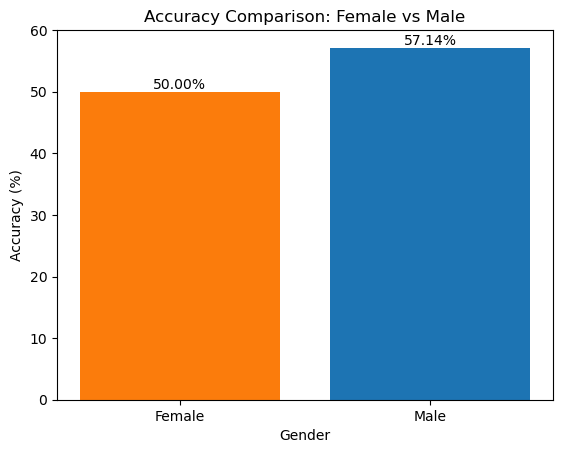

In [59]:
# Accuracy for female and male
accuracy_female = (((TP_f + TN_f) / (TP_f + TN_f + FP_f + FN_f)) * 100)
accuracy_men = (((TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m)) * 100)

# Labels for the two bars
labels = ['Female', 'Male']

# Values for the two bars
comp_accuracy = [accuracy_female, accuracy_men]

# Print Accuracy for female and male
print("Accuracy for female: {:.2f}%".format(accuracy_female))
print("Accuracy for men: {:.2f}%".format(accuracy_men))

# Plotting the bar chart
plt.bar(labels, comp_accuracy, color=['#fb7c0c', '#1d74b3'])

# Adding percentages to the bars
for i, value in enumerate(comp_accuracy):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: Female vs Male')

# Displaying the plot
plt.show()

### Demographic Parity

Demographic Parity for female: 70.59%
Demographic Parity for men: 41.67%


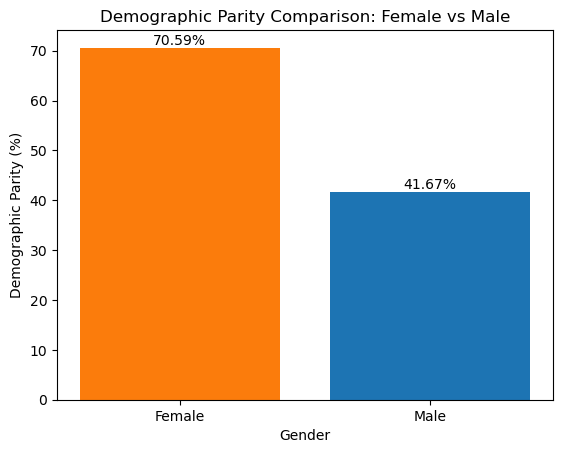

In [62]:
# Demographic Parity for male and female
precision_men = ((TP_m / (TP_m + FP_m)) * 100)
precision_women = ((TP_f / (TP_f + FP_f))* 100)

# Labels for the two bars
labels = ['Female', 'Male']

# Values for the two bars
comp_demo_par = [precision_women, precision_men]

# Print Demographic Parity for female and male
print("Demographic Parity for female: {:.2f}%".format(precision_women))
print("Demographic Parity for men: {:.2f}%".format(precision_men))

# Plotting the bar chart
plt.bar(labels, comp_demo_par, color=['#fb7c0c', '#1d74b3'])

# Adding percentages to the bars
for i, value in enumerate(comp_demo_par):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Demographic Parity (%)')
plt.title('Demographic Parity Comparison: Female vs Male')

# Displaying the plot
plt.show()

### Equal Opportunity

Equal Opportunity for female: 60.00%
Equal Opportunity for men: 38.46%


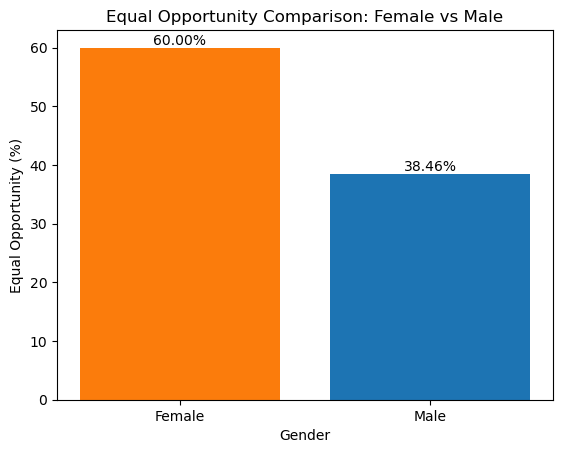

In [77]:
# Equal Opportunity for male and female
equal_opp_male = ((TP_m / (TP_m + FN_m))*100)
equal_opp_female = ((TP_f / (TP_f + FN_f))*100)
 

# Labels for the two bars
labels = ['Female', 'Male']

# Values for the two bars
comp_equal_opp = [equal_opp_female, equal_opp_male]

# Print Equal Opportunity for female and male
print("Equal Opportunity for female: {:.2f}%".format(equal_opp_female))
print("Equal Opportunity for men: {:.2f}%".format(equal_opp_male))

# Plotting the bar chart
plt.bar(labels, comp_equal_opp, color=['#fb7c0c', '#1d74b3'])

# Adding percentages to the bars
for i, value in enumerate(comp_equal_opp):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Equal Opportunity (%)')
plt.title('Equal Opportunity Comparison: Female vs Male')

# Displaying the plot
plt.show()


### Model Accuracy

F1 score for female: 80.00%
F1 score for men: 40.00%


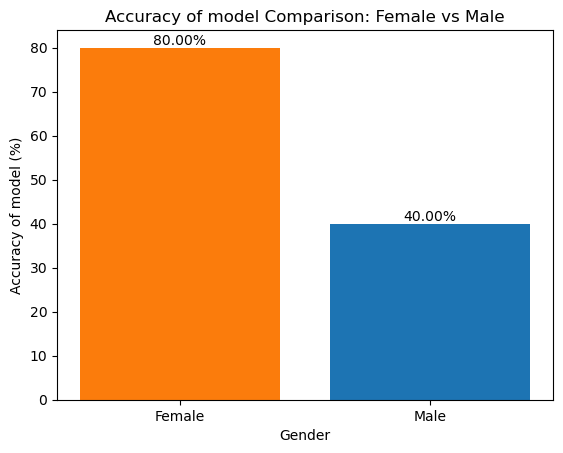

In [78]:

# This is performance metrics for men
accuracy_men = (((TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m))*100)
precision_men = ((TP_m / (TP_m + FP_m))*100)
recall_men = ((TP_m / (TP_m + FN_m))*100)
f1_score_men = 2 * (precision_men * recall_men) / (precision_men + recall_men)

# This is performance metrics for female
accuracy_female = (((TP_f + TN_f) / (TP_f + TN_f + FP_f + FN_f))*100)
precision_female = ((TP_f / (TP_f + FP_f))*100)
recall_female = ((TP_f / (TP_m + FN_m))*100)
f1_score_female = 2 * (precision_female * recall_female) / (precision_female + recall_female)

# Labels for the two bars
labels = ['Female', 'Male']

# Values for the two bars
comp_f1_score = [f1_score_female, f1_score_men]

# Print f1 score for female and male
print("F1 score for female: {:.2f}%".format(f1_score_female))
print("F1 score for men: {:.2f}%".format(f1_score_men))

# Plotting the bar chart
plt.bar(labels, comp_f1_score, color=['#fb7c0c', '#1d74b3'])

# Adding percentages to the bars
for i, value in enumerate(comp_f1_score):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Accuracy of model (%)')
plt.title('Accuracy of model Comparison: Female vs Male')

# Displaying the plot
plt.show()
